## Visualizing Raw EEG using MNE

In this section we will see how to plot various attributes of a raw EEG data file using functions and methods provided by the MNE library. THis includes viewing data over time, over the scalp, and also plotting electrode locations on the scalp. We will use the same data file that we used in the previous section.


In [5]:
import mne
mne.set_log_level('error')

import numpy as np
import matplotlib.pyplot as plt

raw = mne.io.read_raw_brainvision('data/sub-001/sub-001.vhdr', 
                                  preload=True)

## Set Montage

The raw file contains the 10-20 system labels for each channel, but it doesn't provide information about the location of each electrode on the scalp. Internally, MNE can represent the location of each channel in a 3D Cartesian coordinate system. This is necessary to plot the locations of the channels on the scalp, which is extremely useful when visualizing EEG data. The set of coordinates for each channel is called the `montage` of the raw file. We can set the montage of the raw file to the 10-20 system using the `set_montage()` method. This will add the location information to the raw file. MNE provies a large set of standard montages for many commercial EEG systems. For the present data, the EEG caps were manufactured by a company named Easycap, and so we load the montage for the Easycap system.

In [16]:
raw.set_montage('easycap-M1')                                  

<RawBrainVision | sub-001.eeg, 16 x 408640 (817.3 s), ~49.9 MB, data loaded>

The coordinates for each location are stored in the `'dig'` attribute of the `info` object. The `dig` attribute is a list of objects of the MNE type `mne.io._digitization.DigPoint`. Each electrode location is stored as a set of (*x*, *y*, *z*) Cartesian coordinates, i.e., positions in a 3D grid, where *x* is the left-right dimension, *y* is posterior-anterior, and *z* is inferior-posterior. The (0, 0, 0) location is inside the head, located in a plane defined by the bridge of the nose (called the **nasion**) and the left and right ear canals. As shown in the figure below, *x* goes from left (negative) to right (positive), *y* goes from posterior to anterior, and *z* goes from inferior to superior. In general, you won't need to work with this coordinate system directly, but it's useful to know how the data are represented.

In [ ]:
raw.info['dig']

[<DigPoint |        LPA : (-86.1, -0.0, 0.0) mm     : head frame>,
 <DigPoint |     Nasion : (0.0, 86.1, 0.0) mm       : head frame>,
 <DigPoint |        RPA : (86.1, 0.0, 0.0) mm       : head frame>,
 <DigPoint |     EEG #1 : (-29.3, 90.3, 36.8) mm    : head frame>,
 <DigPoint |     EEG #2 : (29.3, 90.3, 36.8) mm     : head frame>,
 <DigPoint |     EEG #3 : (-51.8, 63.9, 87.6) mm    : head frame>,
 <DigPoint |     EEG #4 : (51.8, 63.9, 87.6) mm     : head frame>,
 <DigPoint |     EEG #5 : (-68.3, -0.0, 106.1) mm   : head frame>,
 <DigPoint |     EEG #6 : (68.3, 0.0, 106.1) mm     : head frame>,
 <DigPoint |     EEG #7 : (-51.8, -63.9, 87.6) mm   : head frame>,
 <DigPoint |     EEG #8 : (51.8, -63.9, 87.6) mm    : head frame>,
 <DigPoint |    EEG #11 : (-76.8, 55.8, 36.8) mm    : head frame>,
 <DigPoint |    EEG #12 : (76.8, 55.8, 36.8) mm     : head frame>,
 <DigPoint |    EEG #17 : (0.0, 68.3, 106.1) mm     : head frame>,
 <DigPoint |    EEG #18 : (0.0, 0.0, 135.1) mm      : head fra

Note above that the list of sensor locations does not contain the names of each sensor — the channel names we saw above. In general MNE's data structures are designed to assume that channels are listed in the same order in all attributes of the data structure. So, the order of labels in the list of channel names from `raw.info['ch_names']` corresponds to the order of the channel locations in `raw.info['dig']`. 

In [21]:
raw.info['ch_names']

['Fp1',
 'F3',
 'F7',
 'C3',
 'P3',
 'TP9',
 'Fz',
 'Cz',
 'Fp2',
 'F4',
 'F8',
 'C4',
 'P4',
 'TP10',
 'Pz',
 'Oz']

### View electrode positions

MNE provides tools for viewing channel locations in both 2D and 3D. 

:::{tip}

Always remember to use `plt.show()`, or put a semicolon after an MNE plot command. Otherwise the plot will be drawn twice. 
:::

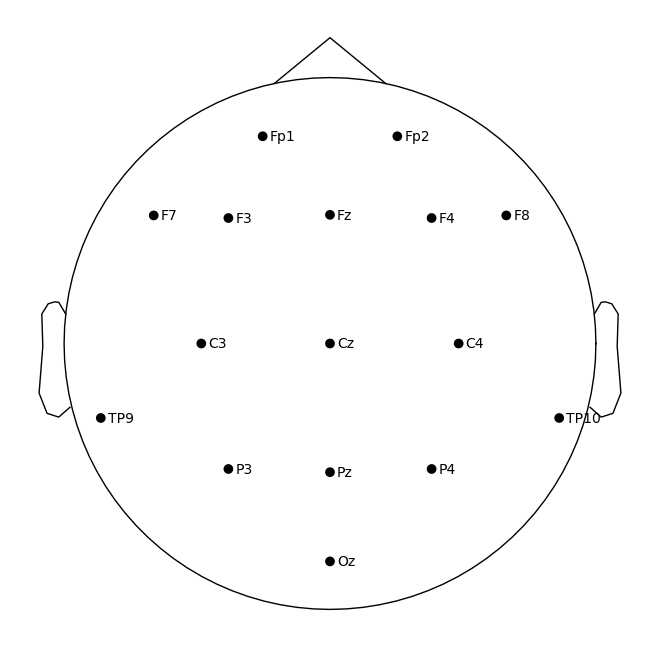

In [17]:
raw.plot_sensors(show_names=True)
plt.show()